# Descriptive Notebook for Text-based Datasets
___
__Name of dataset__: richard_sd_02122018
__Date__: 02.12.2018  
__Creator__: Richard  
__Purpose__: No specific pipeline   
__Crawled Databases__: All databases in Elsevier 

__Used Queries (Code Snippet)____:

```
queries = ["Title-Abstr-Key%28Clustering+AND+data%29+AND+Title%28Clustering%29",
               "Title-Abstr-Key%28Clustering+is%29+AND+Title%28Clustering%29",
               "Title-Abstr-Key%28Classification+is%29+AND+Title%28Classification+OR+Prediction%29",
               "Title-Abstr-Key%28Classification+AND+Prediction%29+AND+Title%28Classification+OR+Prediction%29", 
               "Title-Abstr-Key%28Sequence+Analysis+is%29+AND+Title%28Sequence%29",
               "Title-Abstr-Key%28Sequence+Analysis+AND+data%29+AND+Title%28Sequence%29",
               "Title-Abstr-Key%28Sequence+Analytics+AND+data%29+AND+Title%28Sequence%29",
               "Title-Abstr-Key%28Association+rule+AND+data%29+AND+Title%28Association%29",
               "Title-Abstr-Key%28Association+rule+mining+is%29+AND+Title%28Association%29",
               "Title-Abstr-Key%28Sequential+Pattern%29",
               "Title-Abstr-Key%28Frequent+Pattern%29",
               "Title-Abstr-Key%28Regression+is%29+AND+Title%28Prediction%29",
               "Title-Abstr-Key%28Regression+AND+data%29+AND+Title%28Prediction%29"]
```
__Additional Notes__:  
<p>Dataset consists of already cleaned documents. Amount of crawled data is too high to process here. So every document consists only of one sentence.</p>
<p>The following steps were done: </p>
<ol>
    <li>Filtered sentences to sentences containing any of a list of keywords (see list below)</li>
    <li>Used manually (keyword extraction) created topics to find similarity to sentences</li>
    <li>Only used 25% of the most similar sentences as final dataset.</li>
</ol>
Used Keywords for searching: <br>

```
search_terms_for_patterns = ["frequent pattern mining is", "pattern analysis is", "frequent pattern mining aims", "frequent pattern is", "frequent pattern mining defined", "frequent patterns are", "pattern analysis", "sequential patterns are", "sequential pattern mining is", "sequential pattern mining defined", "pattern mining aims", "pattern mining is", "association rules are", "association rule mining is", "association rule mining aims"]

search_terms_for_prediction = ["prediction aims", "prediction is", "classification is", "classification aims", "classification defined", "classification defines", "regression is", "regression aims", "regression defined", "regression defines", "regression analysis is", "classification analysis is", "classification analysis aims", "regression analysis aims"]

search_terms_for_clustering = ["clustering is", "clustering defined", "clustering defines", "clustering aims", "cluster analysis is", "cluster analysis aims", "cluster analysis defined", "cluster analysis defines"]

```
___


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from typing import *
import string
from tqdm import tqdm
sns.reset_defaults()

## Loading the data 
__Dir structure__ for text-based dataset is stored as illustrated: 
- super_dir
    - dir(represents the class of the txt)
        - 1.txt
        - 2.txt
        - n.txt
    - dir (another class)
        - 1.txt
        - 2.txt
        - n.txt

In [4]:
super_dir = "../helper/data_selection/topic_based_approaches/out"

In [5]:
%%time
_classes = []
_paths = []
_sentences_len = []
_tokens_len = []
_words_len = []
_unique_tokens_len = []
_unique_lemmatized = []
#_tokens = []
_class_tokens = {}
lemmatizer = WordNetLemmatizer()
for root, dirs, files in os.walk(super_dir):
    if len(dirs) == 0:
        # treat super dir as class
        pass
    else:
        for _class_name in dirs: 
            path = os.path.join(super_dir, _class_name)
            #x = [data.append({_class_name: os.path.join(path, x)}) for x in os.listdir(path) if x.endswith(".txt")]
            for file_path in tqdm([x for x in os.listdir(path) if x.endswith(".txt")]):
                
                # Read File
                file = open(os.path.join(path,file_path), "r")
                txt = file.read()
                file.close()
                # Tokenization
                tokens = word_tokenize(txt)
                unique_tokens = set(tokens)
                
                #Building dict[class: tokens]
                if _class_name in _class_tokens.keys():
                    _class_tokens[_class_name] += tokens
                else:
                    _class_tokens.update({_class_name: tokens})
                
                #Filling list for pd.DataFrame
                _unique_lemmatized.append(len({lemmatizer.lemmatize(x) for x in tokens}))
                #[_tokens.append(x) for x in words]
                _tokens_len.append(len(tokens))
                _unique_tokens_len.append(len(set(tokens)))
                _classes.append(_class_name)
                _paths.append(os.path.join(file_path))
                _sentences_len.append(len(sent_tokenize(txt)))
                
                
            


100%|██████████| 2487/2487 [00:04<00:00, 514.92it/s]

CPU times: user 5.68 s, sys: 885 ms, total: 6.57 s
Wall time: 11.4 s


In [6]:
df = pd.DataFrame(list(zip(_classes, _paths, _sentences_len, _tokens_len, _unique_tokens_len, _unique_lemmatized)),
                  columns = ["class", "file_name", "#sentences", "#tokens", "#unique_tokens","#unique_lemmatized"])

In [7]:
df.head()

,class,file_name,#sentences,#tokens,#unique_tokens,#unique_lemmatized
0,sequential_pattern_mining,frequent_pattern_mining_65.txt,2,23,18,18
1,sequential_pattern_mining,frequent_pattern_mining_71.txt,1,16,14,14
2,sequential_pattern_mining,frequent_pattern_mining_59.txt,1,19,18,18
3,sequential_pattern_mining,frequent_pattern_mining_275.txt,1,20,17,17
4,sequential_pattern_mining,frequent_pattern_mining_507.txt,1,19,18,18


In [8]:
#df.describe()

## Descriptive Measures about all Documents

### Tokens and Sentences

In [9]:
%%time
tokens = sum(list(_class_tokens.values()), []) # Get all values of dict[class: [tokens]] in a list
print("Number of documents: {}".format(df.shape[0]))
print("Number of unique files: {}".format(df["file_name"].nunique()))
print("Number of tokens: {}".format(df["#tokens"].sum()))
print("Number of unique tokens: {}".format(len({x for x in tokens})))
print("Number of Sentences: {}\n".format(df["#sentences"].sum()))

Number of documents: 5186
Number of unique files: 5186
Number of tokens: 155801
Number of unique tokens: 7589
Number of Sentences: 5592

CPU times: user 25.8 ms, sys: 3.45 ms, total: 29.2 ms
Wall time: 28 ms


### Noise in Corpus

In [10]:
%%time
noise_numb = [x for x in tokens if x.isdigit()]
noise_punct = [x for x in tokens if x in string.punctuation]
noise_stopw = [x for x in tokens if x in stopwords.words('english')]
noise = len(noise_numb) + len(noise_punct) + len(noise_stopw)
noise_measure = noise/len(tokens) * 100

print("Digits in tokens: {}".format(len(noise_numb)))
print("Punctuation in tokens: {}".format(len(noise_punct)))
print("Stop-Words in tokens: {}".format(len(noise_stopw)))
print("Noise in corpus: {}%\n".format(noise_measure))

Digits in tokens: 0
Punctuation in tokens: 11688
Stop-Words in tokens: 57928
Noise in corpus: 44.68264003440286%

CPU times: user 22.7 s, sys: 4.92 s, total: 27.6 s
Wall time: 27.9 s


### Words in Corpus

In [14]:
%%time
unique_words = set(tokens)-set(noise_numb)-set(noise_punct)-set(noise_stopw)
len_unique_words = len(unique_words)
len_unique_lemmas = len({lemmatizer.lemmatize(x) for x in unique_words})

print("Unique words: {}".format(len_unique_words))
print("Unqiue words after lemmatization (unique): {}".format(len_unique_lemmas))
print("Unique word lost caused by lemmatization: {}%\n".format((1-(len_unique_lemmas/len_unique_words))*100))

Unique words: 7470
Unqiue words after lemmatization (unique): 6715
Unique word lost caused by lemmatization: 10.107095046854086%

CPU times: user 54.7 ms, sys: 3.84 ms, total: 58.6 ms
Wall time: 55.9 ms


## Visualizations

TODO: 
1. There is still the _class_tokens object(dict[class_name: [tokens]]). Visualization about number of words, noise, etc. per class

### Class Distribution

class
clustering                   2487
prediction                   2189
sequential_pattern_mining     510
Name: file_name, dtype: int64

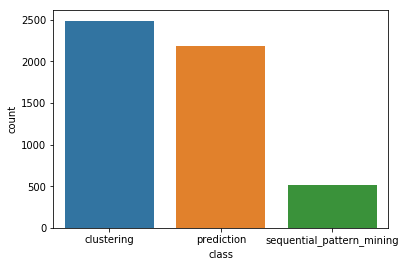

In [15]:
ax = sns.countplot(x="class", data=df, order = df['class'].value_counts().index)
df.groupby('class').count()["file_name"]

### Barplot Document-Level

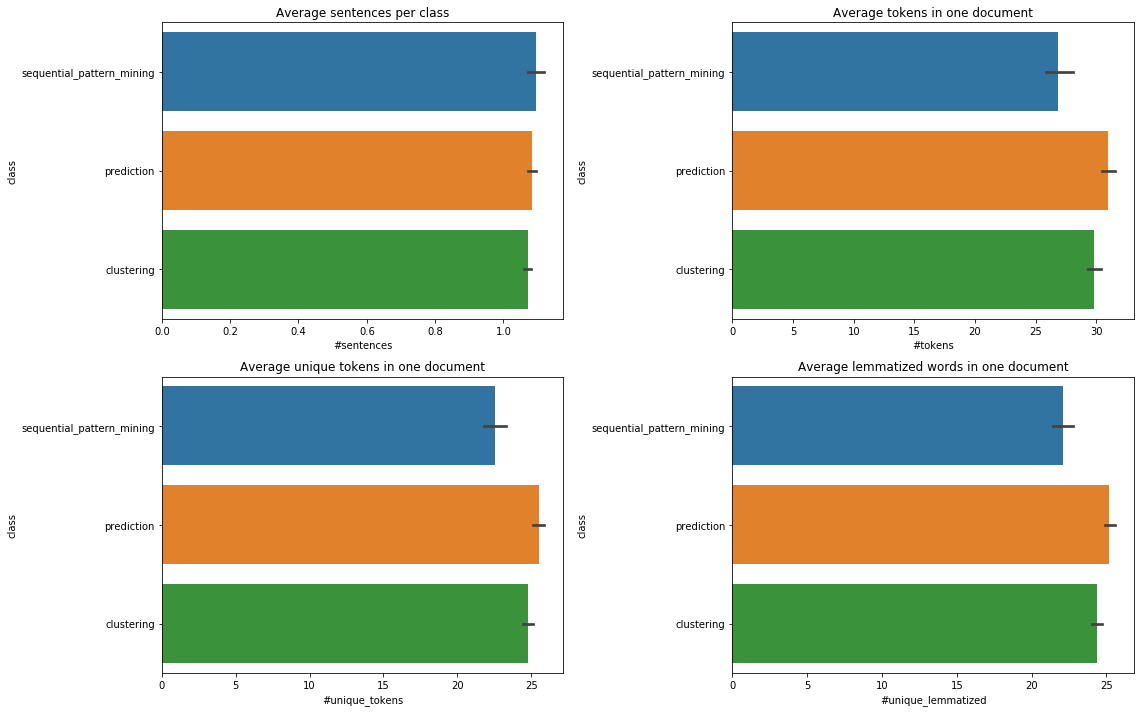

In [16]:
figure = plt.figure()
#figure.suptitle("Averaged Measures")
figure.set_size_inches(16,10)

ax_1 = figure.add_subplot(2,2,1)
ax_2 = figure.add_subplot(2,2,2)
ax_3 = figure.add_subplot(2,2,3)
ax_4 = figure.add_subplot(2,2,4)

ax_1.set_title("Average sentences per class")
ax_2.set_title("Average tokens in one document")
ax_3.set_title("Average unique tokens in one document")
ax_4.set_title("Average lemmatized words in one document")

plt_sent = sns.barplot(x="#sentences", y = "class", data=df, ax=ax_1)
plt_word = sns.barplot(x="#tokens", y = "class", data = df, ax=ax_2)
plt_uword = sns.barplot(x="#unique_tokens", y = "class", data = df, ax=ax_3)
plt_lemma = sns.barplot(x="#unique_lemmatized", y = "class", data = df, ax=ax_4)

plt.tight_layout()